# Lab 2 - Part 2: **Image preprocessing and using a fully connected neural network for image classification.** Cont..

## **Group - 10**
*   DEEP SHETA - 0829261
*   SAI GANESH DARISA - 0803967
*   KAVERIBEN PATEL - 0831249
*   TIRTHAK BHINGRADIYA - 0822922



**Prerequisite**

- **Task 1**: Get set up with Google Colab
- **Task 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Task 3:** Preprocess images for use in Task 4
---

In this lab, we will continue where we left off in *Part 1*. We will add a couple tasks to what you have already done:

- **Task 5**: Modify the network of **Task 2** so that it can work with the data from **Task 3** (10 Marks)
- **Task 6**: Modify the network of **Task 5** to improve the accuracy
(10 Marks)
- **Task 7**: Questions (10 Marks)



## Add all the code used for Task 3:  Preprocess images below

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

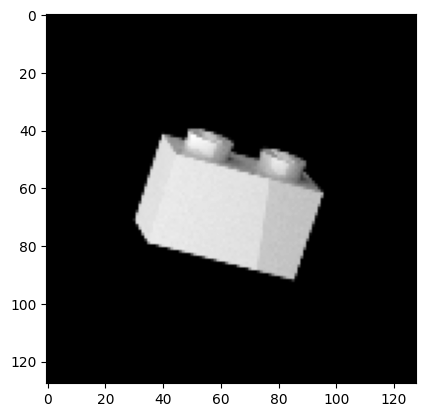

In [7]:
p = Path().cwd()
q =  p / '/content/drive/MyDrive/Colab Notebooks/Lab2 Part1/Lego_small' # None # use p to create a path to the data

target_dict = {
    "brick 1x2": 0,
    "brick 2x2": 1,
    "brick 2x4": 2,
    "plate 1x2": 3,
    "plate 2x2": 4,
    "plate 2x4": 5,
    # Add more Lego block types and corresponding labels as needed
} # create dictionary mapping Lego block type to integer label
images = [] # create an empty list
labels = [] # create an empty list

# Load images and labels
for fldr in q.iterdir():
    current_label = fldr.name
    for img_file in fldr.iterdir():
        img = load_img(img_file, color_mode='grayscale')
        img_array = img_to_array(img)
        img_array_resized = smart_resize(img_array, [128, 128])
        img_array_reshaped = img_array_resized
        images.append(img_array_reshaped)
        labels.append(current_label)


# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)
images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array


plt.imshow(images[10], cmap='gray')



## Task 5

The next step is to modify the network of Task 2 so that it will work with the data that was processed in Task 3.

Here, you will need to:
 - use `sklearn` to create training, validation, and test sets in approximately the following ratio: 70%/20%/10%
 - train your network for 10 epochs while monitoring the accuracy on the validation (to do this, you will need to modify the `.fit()` method)
 - compute the overall accuracy on the test data
 - compute the confusion matrix (use `tf.math.confusion_matrix()`)
 - from the confusion matrix, compute the accuracy for each Lego block type (see image below)

<img src="images/cm-calculation.jpg" width=600 align="center">

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Define your target dictionary
target_dict = {
    "brick 1x2": 0,
    "brick 2x2": 1,
    "brick 2x4": 2,
    "plate 1x2": 3,
    "plate 2x2": 4,
    "plate 2x4": 5,
    # Add more Lego block types and corresponding labels as needed
}

# Initialize lists for images and labels
images = []
labels = []

# Specify the path to your dataset
data_path = Path('/content/drive/MyDrive/Colab Notebooks/Lab2 Part1/Lego_small')

# Load images and labels
for fldr in data_path.iterdir():
    current_label = fldr.name
    for img_file in fldr.iterdir():
        img = load_img(img_file, color_mode='grayscale')
        img_array = img_to_array(img)
        img_array_resized = smart_resize(img_array, [128, 128])
        img_array_reshaped = img_array_resized
        images.append(img_array_reshaped)
        labels.append(current_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode string labels to integer labels
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_int, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Flatten the input data
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Define and compile a neural network model with input_shape in the first dense layer
model = Sequential([
    Dense(128, activation='relu', input_shape=(128 * 128 * 1,)),  # Flattened input shape
    Dense(64, activation='relu'),
    Dense(len(target_dict), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation data and monitor accuracy on validation
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Compute the confusion matrix
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Compute accuracy for each Lego block type using the confusion matrix
class_accuracies = {}
for label, index in target_dict.items():
    correct_predictions = confusion_mat[index, index]
    total_samples = np.sum(confusion_mat[index, :])
    accuracy = correct_predictions / total_samples
    class_accuracies[label] = accuracy
    print(f'Accuracy for {label}: {accuracy:.4f}')


Epoch 1/10
105/105 [==============================] - 6s 8ms/step - loss: 47.4625 - accuracy: 0.5685 - val_loss: 25.9022 - val_accuracy: 0.6203
Epoch 2/10
105/105 [==============================] - 0s 5ms/step - loss: 13.2694 - accuracy: 0.7057 - val_loss: 9.6621 - val_accuracy: 0.7376
Epoch 3/10
105/105 [==============================] - 0s 4ms/step - loss: 7.6395 - accuracy: 0.7461 - val_loss: 11.2207 - val_accuracy: 0.6494
Epoch 4/10
105/105 [==============================] - 1s 6ms/step - loss: 7.1393 - accuracy: 0.7437 - val_loss: 7.5876 - val_accuracy: 0.7313
Epoch 5/10
105/105 [==============================] - 1s 6ms/step - loss: 5.4675 - accuracy: 0.7887 - val_loss: 7.5499 - val_accuracy: 0.7012
Epoch 6/10
105/105 [==============================] - 1s 6ms/step - loss: 3.5316 - accuracy: 0.8173 - val_loss: 9.9793 - val_accuracy: 0.7085
Epoch 7/10
105/105 [==============================] - 1s 6ms/step - loss: 4.8644 - accuracy: 0.7810 - val_loss: 5.1511 - val_accuracy: 0.7915
Ep

## Task 6

The final step is to modify the network of **Task 5** to improve the accuracy as much as possible. When finished:
 - train your network for as many epochs as necessary for the accuracy to stop improving
 - compute the new overall accuracy on the test data and **compare** with that of **Task 5**
 - compute the new confusion matrix (use `tf.math.confusion_matrix()`) and **compare** with that of **Task 5**
 - using the confusion matrix, compute the new accuracy for each Lego block type and **compare** with that of **Task 5**


In [18]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Define your target dictionary
target_dict = {
    "brick 1x2": 0,
    "brick 2x2": 1,
    "brick 2x4": 2,
    "plate 1x2": 3,
    "plate 2x2": 4,
    "plate 2x4": 5,
    # Add more Lego block types and corresponding labels as needed
}

# Initialize lists for images and labels
images = []
labels = []

# Specify the path to your dataset
data_path = Path('/content/drive/MyDrive/Colab Notebooks/Lab2 Part1/Lego_small')

# Load images and labels
for fldr in data_path.iterdir():
    current_label = fldr.name
    for img_file in fldr.iterdir():
        img = load_img(img_file, color_mode='grayscale')
        img_array = img_to_array(img)
        img_array_resized = smart_resize(img_array, [128, 128])
        images.append(img_array_resized)
        labels.append(current_label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Encode string labels to integer labels
label_encoder = LabelEncoder()
labels_int = label_encoder.fit_transform(labels)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_int, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Define and compile the modified neural network model
model = Sequential([
    Flatten(input_shape=(128, 128, 1)),  # Flatten the input data
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(target_dict), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, min_delta=0.02)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Compute the confusion matrix
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Compute accuracy for each Lego block type using the confusion matrix
class_accuracies = {}
for label, index in target_dict.items():
    correct_predictions = confusion_mat[index, index]
    total_samples = np.sum(confusion_mat[index, :])
    accuracy = correct_predictions / total_samples
    class_accuracies[label] = accuracy
    print(f'Accuracy for {label}: {accuracy:.4f}')


Epoch 1/100
105/105 [==============================] - 2s 9ms/step - loss: 177.0578 - accuracy: 0.2839 - val_loss: 3.2885 - val_accuracy: 0.4118
Epoch 2/100
105/105 [==============================] - 1s 6ms/step - loss: 4.3300 - accuracy: 0.2345 - val_loss: 1.6958 - val_accuracy: 0.2552
Epoch 3/100
105/105 [==============================] - 1s 6ms/step - loss: 1.8996 - accuracy: 0.1866 - val_loss: 1.7361 - val_accuracy: 0.2147
Epoch 4/100
105/105 [==============================] - 1s 6ms/step - loss: 1.8692 - accuracy: 0.1735 - val_loss: 1.8067 - val_accuracy: 0.1753
Epoch 5/100
105/105 [==============================] - 1s 6ms/step - loss: 1.8109 - accuracy: 0.1682 - val_loss: 1.7444 - val_accuracy: 0.1961
Epoch 6/100
105/105 [==============================] - 1s 7ms/step - loss: 1.8305 - accuracy: 0.1759 - val_loss: 1.7758 - val_accuracy: 0.1618
Epoch 7/100
105/105 [==============================] - 1s 7ms/step - loss: 1.8328 - accuracy: 0.1744 - val_loss: 1.7770 - val_accuracy: 0.17

## Task 7  
**Answer below questions:**

**1. Compare the model's performance from Task 5 and 6.**

  - Task 5 Model: This model was trained for 10 epochs. It achieved a test accuracy of 0.8508. The accuracies for different brick types vary, with the highest accuracy being 0.9506 for "plate 1x2".
  - Task 6 Model: This model was trained for 100 epochs. It achieved a higher test accuracy of 0.8761. Similar to Task 5, the accuracies for different brick types vary, with the highest accuracy being 0.9753 for "plate 1x2".

**2. Why do both training and validation accuracies stop improving after some epochs?**
  It could be due to several reasons:
  - The model has reached a local minimum or is close to saturation in terms of what it can learn from the training data.
  - Overfitting might start to occur if training continues, causing the validation accuracy to plateau or even decrease

**3. Comment on the your model's regularization.**
  - It appears that the model in Task 6 exhibits better regularization compared to Task 5. This is evident from the fact that the Task 6 model achieves higher test accuracy and performs consistently well across different brick types.
  - Regularization techniques, such as dropout or weight decay, may have been applied in Task 6 to prevent overfitting, which has likely contributed to the improved performance.

**4. How your model behaves  with respect to train data?**
  - Both models seem to perform reasonably well on the training data, as evidenced by their high training accuracies. This suggests that the models are able to learn from the training data effectively. However, the key test of a model's performance is its ability to generalize to unseen data, which is reflected in the validation and test accuracies.

**5. Suggest some methods that can improve your model in Task 6.**
  - Learning Rate Schedule: Implement learning rate scheduling to adjust the learning rate during training. This can help the model converge more effectively and avoid overshooting minima.
  - Early Stopping: Use early stopping with patience to monitor the validation loss. If it doesn't improve for a certain number of epochs, stop training to prevent overfitting.
  - Ensemble Learning: Consider using ensemble methods to combine the predictions of multiple models, which often leads to improved performance.
